# Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import yfinance as yf
import eurostat_lib as el

import my_lib as ml

info = pd.read_parquet('Data/InstrumentsInfo.parquet.gzip')

<Axes: xlabel='date'>

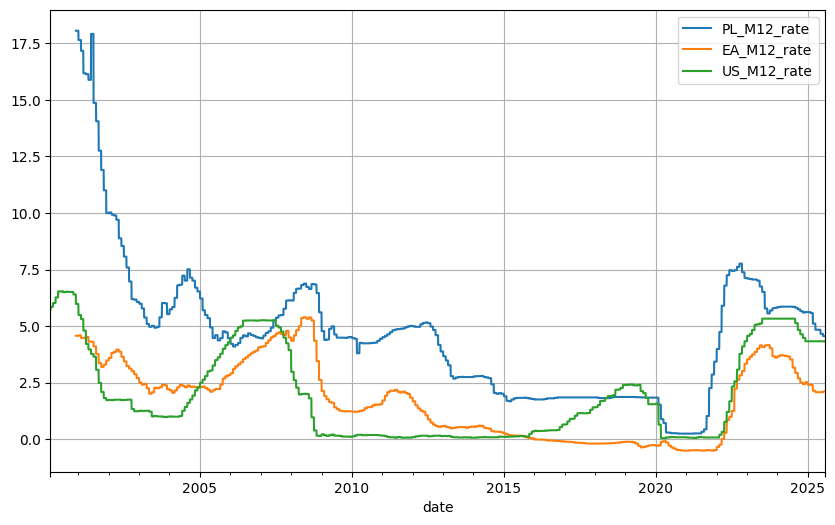

In [2]:
rates_US = pd.read_csv('Data/FEDFUNDS.csv').rename(columns={'observation_date': 'Date', 'FEDFUNDS': 'US_M12_rate'})
rates_US.index = pd.DatetimeIndex(rates_US['Date'])

rates_US = rates_US[['US_M12_rate']]

rates_EURO = el.getRATES(start='2000-01-01', end=ml.today(), countries=['Poland', 'Euro Zone'])

rates = rates_EURO.join(rates_US, how='outer')
rates = rates.loc[rates.index > '2000-01-01', :]

dates = pd.date_range(rates.index[0], rates.index[-1], freq='D')
dates.name = 'date'
rates = rates.reindex(dates, method='bfill')

rates.plot(figsize=(10, 6), grid=True)

# Akcyjne

## Vanguard All-World, EUR, dywidendowy

,259
symbol,VGWL.DE
shortName,Vanguard FTSE All-World U.ETF R
longName,Vanguard FTSE All-World UCITS ETF
language,en-US
fundFamily,Vanguard Group (Ireland) Limited
quoteType,ETF
quoteSourceName,Delayed Quote
currency,EUR
netExpenseRatio,NaN
priceHint,2.0


,VGWL.DE,Dividends,EURPLN,VGWL.DE_PLN,Dividends_PLN,Dividends rate
Date,,,,,,
2024-03-15,112.769478,0.353470,4.29087,483.879191,1.516694,0.003134
2024-06-13,119.158188,0.732356,4.33126,516.105117,3.172024,0.006146
2024-09-12,119.657074,0.439345,4.28470,512.694655,1.882461,0.003672
2024-12-12,133.982697,0.426409,4.26897,571.968114,1.820327,0.003183
2025-03-20,126.462425,0.428190,4.18210,528.878486,1.790733,0.003386
2025-06-19,125.379997,0.757221,4.27081,535.474162,3.233947,0.006039


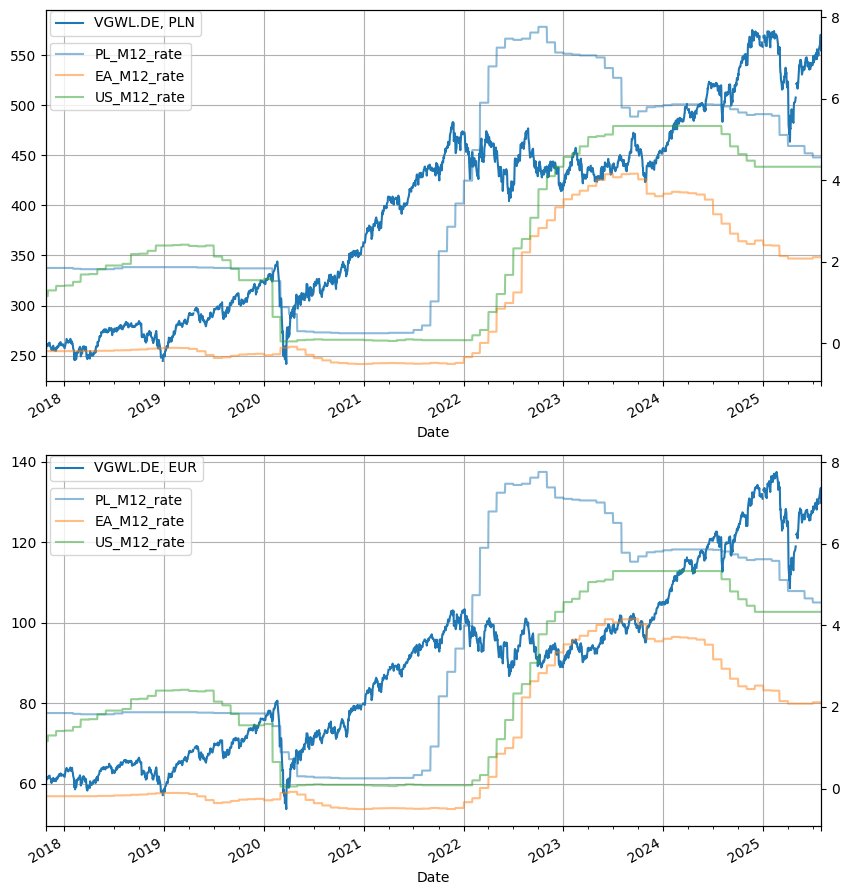

In [3]:
symbol = 'VGWL.DE'

ml.summarise(symbol, rates)

## Vanguard All-World High Dividend, USD, dywidendowy

,VHYL.L,Dividends,USDPLN,VHYL.L_PLN,Dividends_PLN,Dividends rate
Date,,,,,,
2024-03-14,48.548203,0.286638,3.906180,189.638013,1.119660,0.005904
2024-06-13,49.282177,0.629746,4.005734,197.411290,2.522595,0.012778
2024-09-12,50.392651,0.378217,3.891700,196.113080,1.471907,0.007505
2024-12-12,52.967033,0.338533,4.063248,215.218201,1.375544,0.006391
2025-03-20,54.147003,0.345357,3.832745,207.531660,1.323665,0.006378
2025-06-19,53.605000,0.658418,3.720400,199.432045,2.449578,0.012283


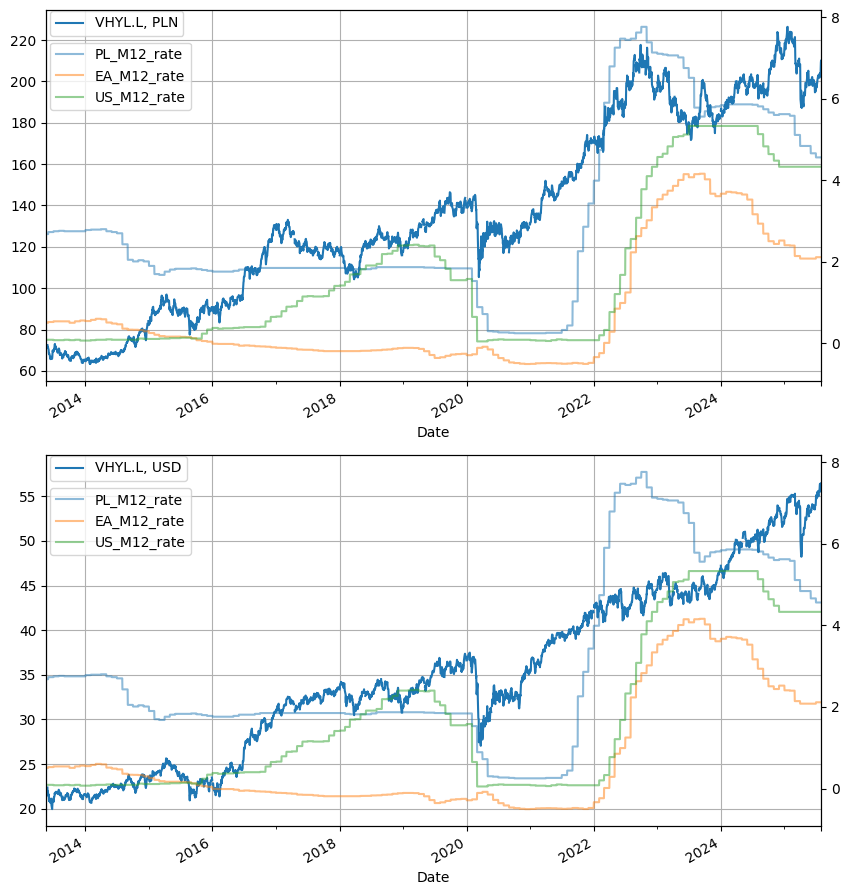

In [4]:
symbol = 'VHYL.L' # waluta: USD

ml.summarise(symbol, rates)

## iShares na rynki wschodzące, EUR, akumulujący

,998
symbol,IS3N.DE
shortName,iShs Core MSCI EM IMI U.ETF R
longName,iShares Core MSCI EM IMI UCITS ETF USD (Acc)
language,en-US
fundFamily,BlackRock Asset Management Ireland - ETF
quoteType,ETF
quoteSourceName,Delayed Quote
currency,EUR
netExpenseRatio,0.18
priceHint,2.0


,IS3N.DE,Dividends,EURPLN,IS3N.DE_PLN,Dividends_PLN,Dividends rate
Date,,,,,,


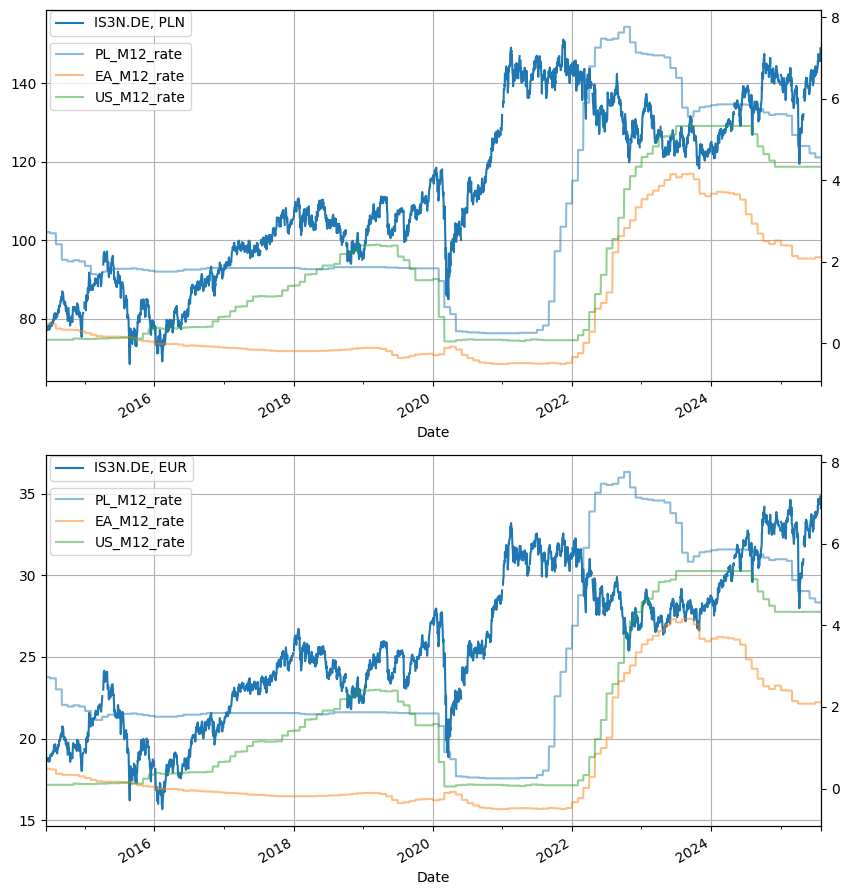

In [5]:
symbol = 'IS3N.DE'

ml.summarise(symbol, rates)

## iShares na rynki azjatyckie, USD, akumulujący

,1016
symbol,CEBL.DE
shortName,iShs VII-MSCI EM Asia U.ETF R
longName,iShares VII PLC - iShares MSCI EM Asia ETF USD...
language,en-US
fundFamily,BlackRock Asset Management Ireland - ETF
quoteType,ETF
quoteSourceName,Delayed Quote
currency,EUR
netExpenseRatio,0.2
priceHint,2.0


,CEBL.DE,Dividends,EURPLN,CEBL.DE_PLN,Dividends_PLN,Dividends rate
Date,,,,,,


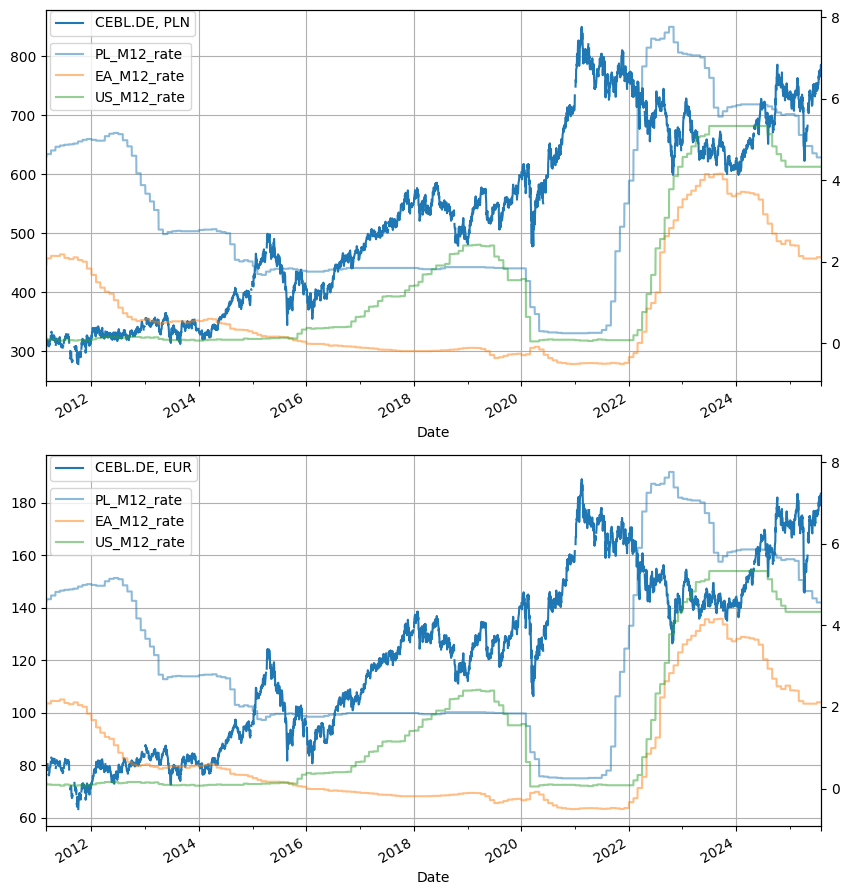

In [4]:
symbol = 'CEBL.DE'

ml.summarise(symbol, rates)

## iShares na indeks S&P500, USD, akumulujący

,880
symbol,SXR8.DE
shortName,iShs VII-Core S&P 500 U.ETF R
longName,iShares Core S&P 500 UCITS ETF USD (Acc)
language,en-US
fundFamily,BlackRock Asset Management Ireland - ETF
quoteType,ETF
quoteSourceName,Delayed Quote
currency,EUR
netExpenseRatio,0.07
priceHint,2.0


,SXR8.DE,Dividends,EURPLN,SXR8.DE_PLN,Dividends_PLN,Dividends rate
Date,,,,,,


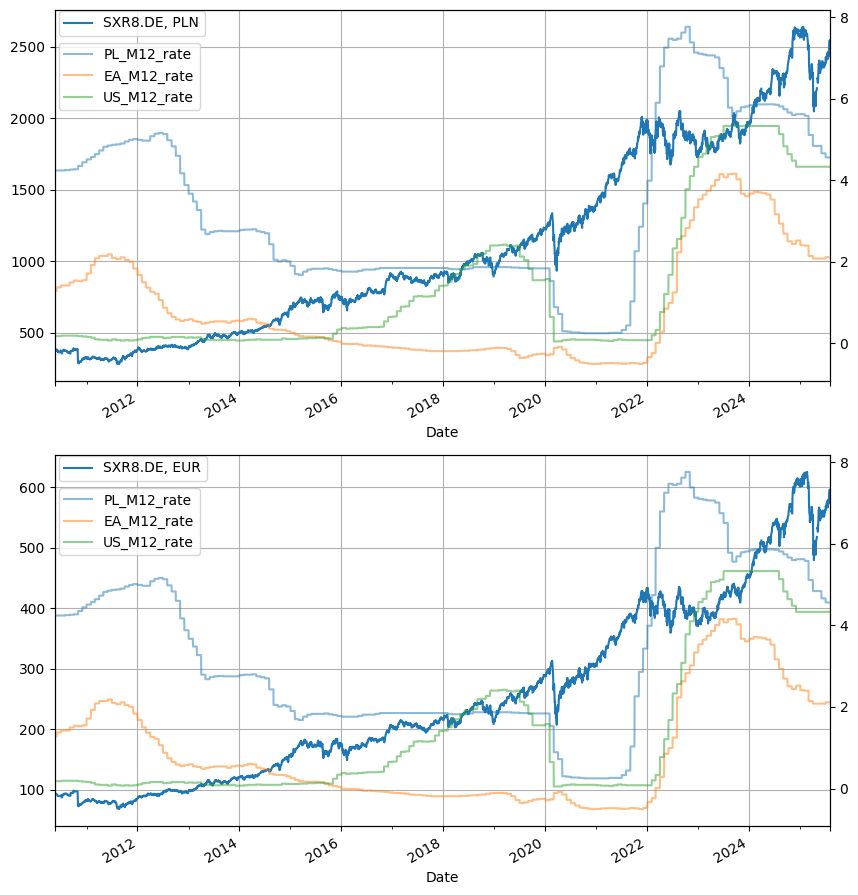

In [3]:
symbol = 'SXR8.DE'

ml.summarise(symbol, rates)

## iShares na indeks MSCI USA, USD, akumulujący

,1301
symbol,SXR4.DE
shortName,iShsVII-MSCI USA UCITS ETF R
longName,iShares VII PLC - iShares MSCI USA ETF USD Acc
language,en-US
fundFamily,BlackRock Asset Management Ireland - ETF
quoteType,ETF
quoteSourceName,Delayed Quote
currency,EUR
netExpenseRatio,0.33
priceHint,2.0


,SXR4.DE,Dividends,EURPLN,SXR4.DE_PLN,Dividends_PLN,Dividends rate
Date,,,,,,


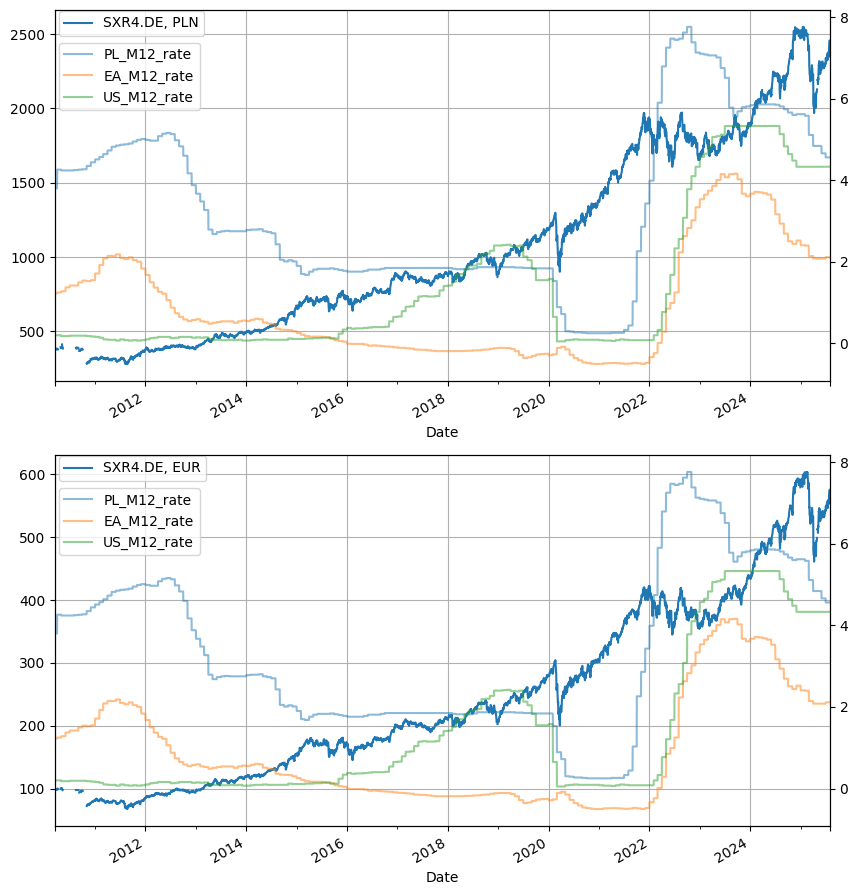

In [4]:
symbol = 'SXR4.DE'

ml.summarise(symbol, rates)

## Beta ETF na indeks WIG20, PLN, akumulujący

,916
symbol,ETFBW20TR.WA
shortName,ETFBW20TR
longName,Beta ETF WIG20TR PCIF-Investment Certificates
language,en-US
fundFamily,None
quoteType,ETF
quoteSourceName,Delayed Quote
currency,PLN
netExpenseRatio,NaN
priceHint,2.0


HTTP Error 404: 
$PLNPLN=X: possibly delisted; no timezone found


,ETFBW20TR.WA,Dividends,PLNPLN,ETFBW20TR.WA_PLN,Dividends_PLN,Dividends rate
Date,,,,,,


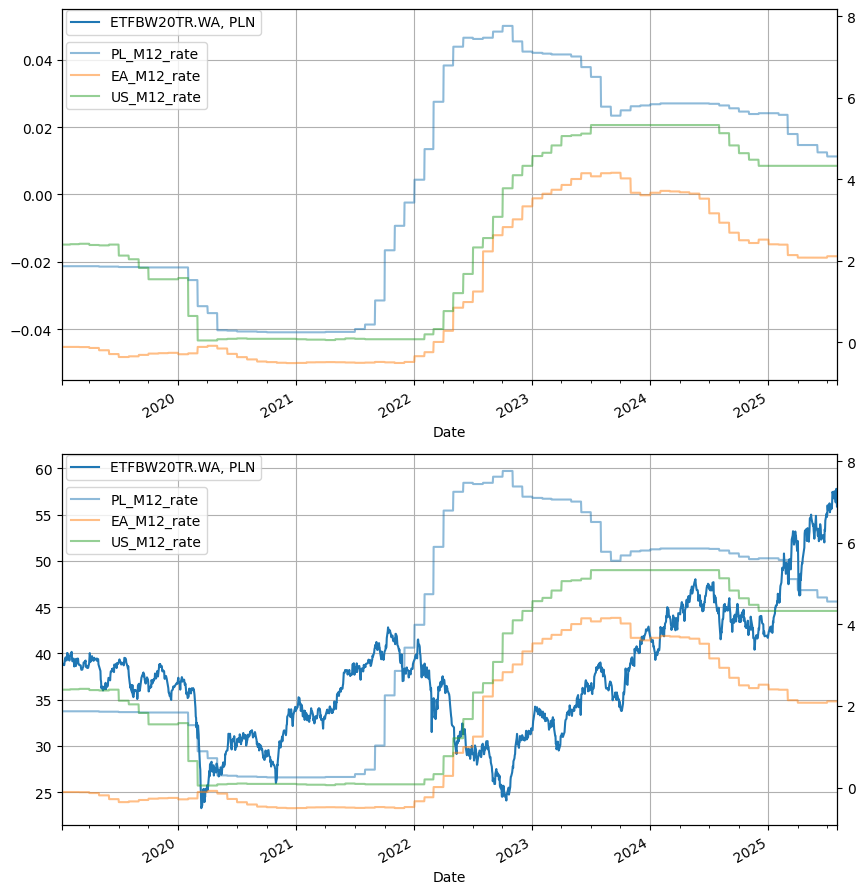

In [8]:
symbol = 'ETFBW20TR.WA'

ml.summarise(symbol, rates)

## VanEck na światowy sektor zbrojeniowy, EUR, akumulujący

,404
symbol,DFEN.DE
shortName,VanEck ETFs-VanEck Defense ETFR
longName,VanEck Defense ETF A USD Acc
language,en-US
fundFamily,VanEck Asset Management B.V.
quoteType,ETF
quoteSourceName,Delayed Quote
currency,EUR
netExpenseRatio,0.55
priceHint,2.0


,DFEN.DE,Dividends,EURPLN,DFEN.DE_PLN,Dividends_PLN,Dividends rate
Date,,,,,,


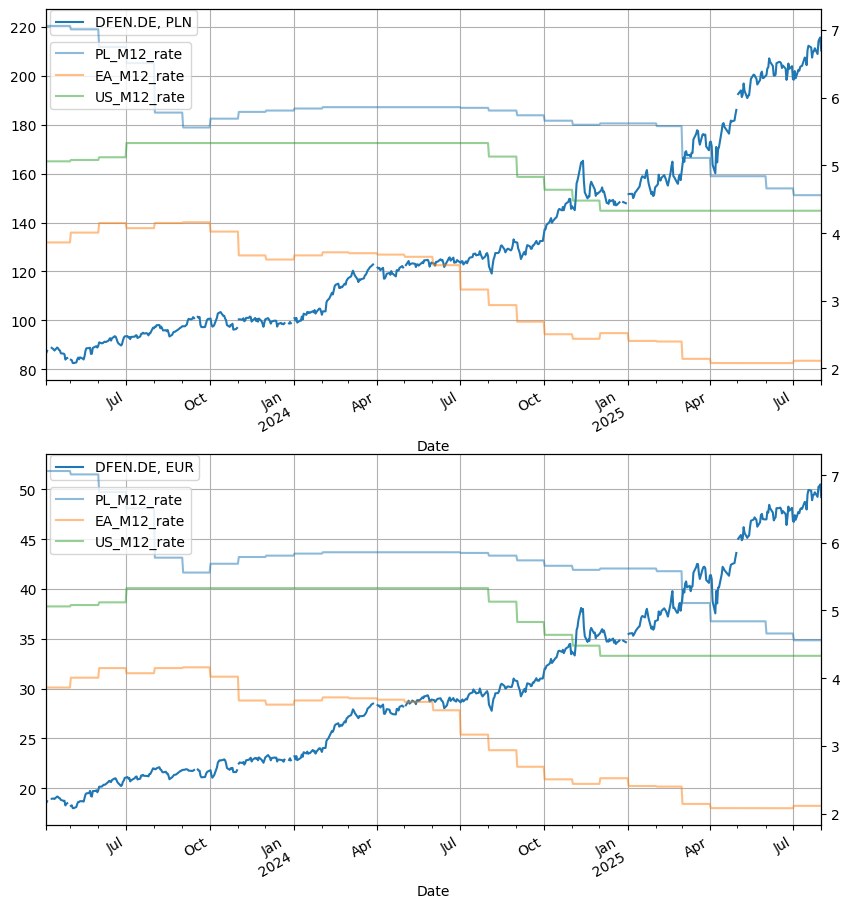

In [12]:
symbol = 'DFEN.DE'

ml.summarise(symbol, rates)

# Obligacji

## iShares obligacji korporacyjnych strefy Euro, EUR, dywidendowy

,283
symbol,EUN5.DE
shortName,iShsIII-Core EO Corp.Bd U.ETF R
longName,iShares Core € Corp Bond UCITS ETF EUR (Dist)
language,en-US
fundFamily,BlackRock Asset Management Ireland - ETF
quoteType,ETF
quoteSourceName,Delayed Quote
currency,EUR
netExpenseRatio,0.2
priceHint,2.0


,EUN5.DE,Dividends,EURPLN,EUN5.DE_PLN,Dividends_PLN,Dividends rate
Date,,,,,,
2023-01-12,106.446907,1.2521,4.68497,498.700556,5.866051,0.011763
2023-07-13,106.983780,1.7762,4.43360,474.323281,7.874960,0.016603
2024-01-11,111.452477,2.0209,4.33230,482.845585,8.755145,0.018132
2024-07-18,114.078011,2.0996,4.28750,489.109459,9.002035,0.018405
2025-01-16,116.978035,2.0396,4.25663,497.932206,8.681822,0.017436
2025-07-17,120.120003,1.9446,4.25249,510.809116,8.269392,0.016189


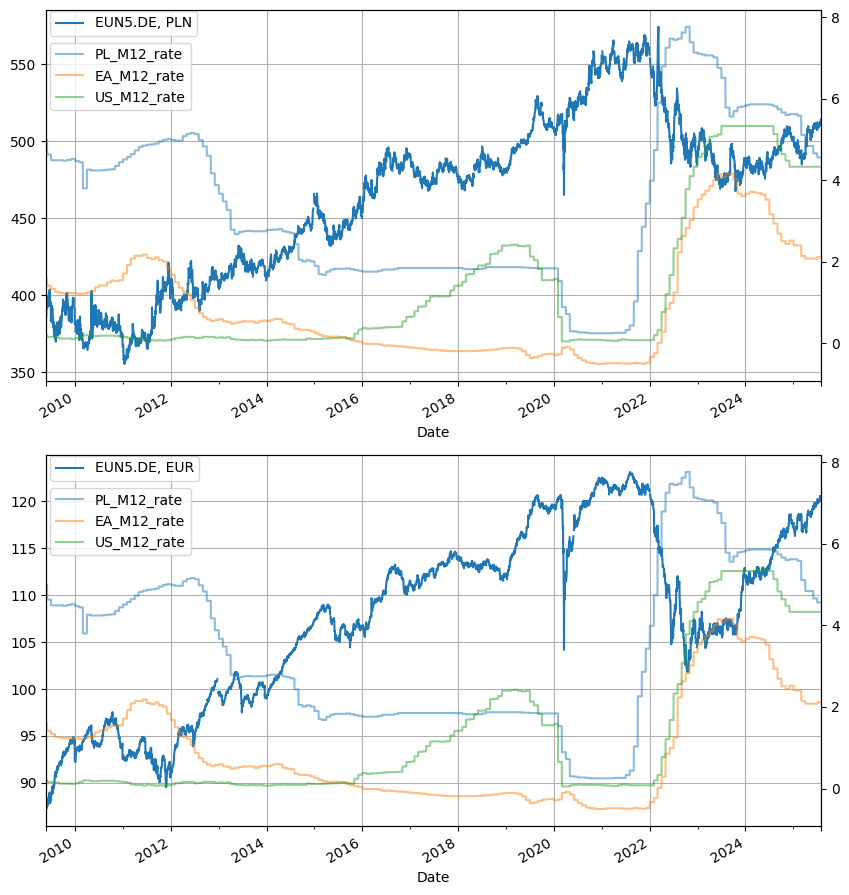

In [7]:
symbol = 'EUN5.DE'

ml.summarise(symbol, rates)

## iShares obligacji korporacyjnych amerykańskich, USD, dywidendowy

Na niego warto spoglądać, bo Fed niedługo pewnie zacznie obniżać stopy

,806
symbol,LQDE.L
shortName,ISHARES PLC ISHARES $ CORP.BOND
longName,iShares $ Corp Bond UCITS ETF USD (Dist)
language,en-US
fundFamily,BlackRock Asset Management Ireland - ETF
quoteType,ETF
quoteSourceName,Delayed Quote
currency,USD
netExpenseRatio,0.2
priceHint,2.0


,LQDE.L,Dividends,USDPLN,LQDE.L_PLN,Dividends_PLN,Dividends rate
Date,,,,,,
2024-03-14,95.103958,1.2490,3.906180,371.493170,4.878819,0.013133
2024-06-13,96.634628,1.2785,4.005734,387.092613,5.121331,0.013230
2024-09-12,101.533119,1.2593,3.891700,395.136443,4.900818,0.012403
2024-12-12,99.960960,1.2642,4.063248,406.166188,5.136758,0.012647
2025-03-13,99.020287,1.2780,3.845200,380.752812,4.914166,0.012906
2025-06-12,100.760002,1.2553,3.691933,371.999169,4.634483,0.012458


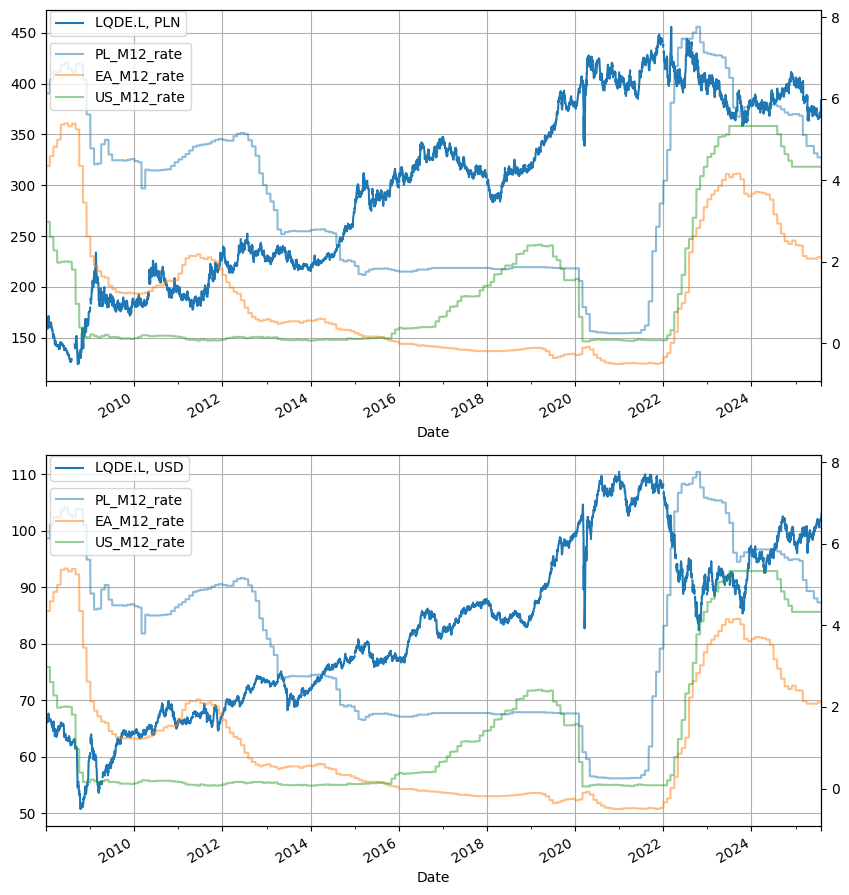

In [6]:
symbol = 'LQDE.L'

ml.summarise(symbol, rates)

## iShares obligacji skarbowych 20+ amerykańskich, USD, akumulujący

,1221
symbol,DTLA.L
shortName,ISHARES IV PLC ISH $ T BND 20+Y
longName,iShares $ Treasury Bond 20+yr UCITS ETF
language,en-US
fundFamily,BlackRock Asset Management Ireland - ETF
quoteType,ETF
quoteSourceName,Delayed Quote
currency,USD
netExpenseRatio,0.07
priceHint,4.0


,DTLA.L,Dividends,USDPLN,DTLA.L_PLN,Dividends_PLN,Dividends rate
Date,,,,,,


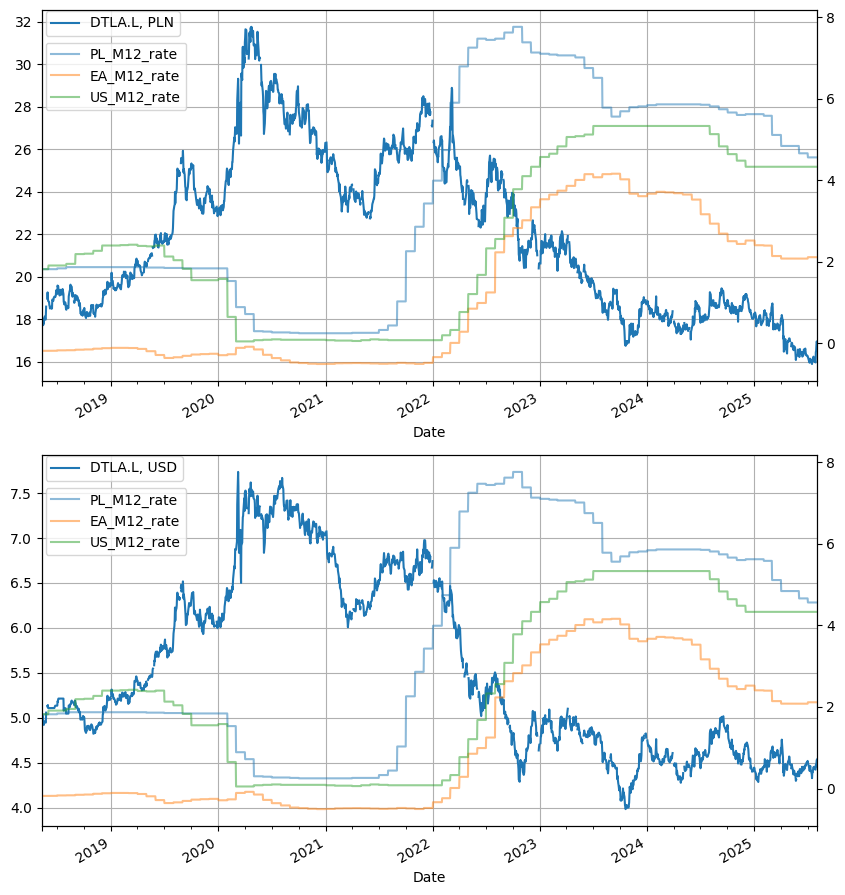

In [5]:
symbol = 'DTLA.L'

ml.summarise(symbol, rates)

## iShares obligacji skarbowych 20+ amerykańskich, USD, dywidendowy

,379
symbol,IDTL.L
shortName,ISHARES IV PLC ISHS $ TRSRY BD
longName,iShares $ Treasury Bond 20+yr UCITS ETF USD (D...
language,en-US
fundFamily,BlackRock Asset Management Ireland - ETF
quoteType,ETF
quoteSourceName,Delayed Quote
currency,USD
netExpenseRatio,0.07
priceHint,4.0


,IDTL.L,Dividends,USDPLN,IDTL.L_PLN,Dividends_PLN,Dividends rate
Date,,,,,,
2022-12-15,3.620440,0.0592,4.380911,15.860823,0.259350,0.016352
2023-06-15,3.480637,0.0669,4.103170,14.281644,0.274502,0.019221
2023-12-14,3.412186,0.0717,3.947541,13.469746,0.283039,0.021013
2024-06-13,3.287853,0.0758,4.005734,13.170263,0.303635,0.023055
2024-12-12,3.288449,0.0755,4.063248,13.361783,0.306775,0.022959
2025-06-12,3.190000,0.0671,3.691933,11.777266,0.247729,0.021034


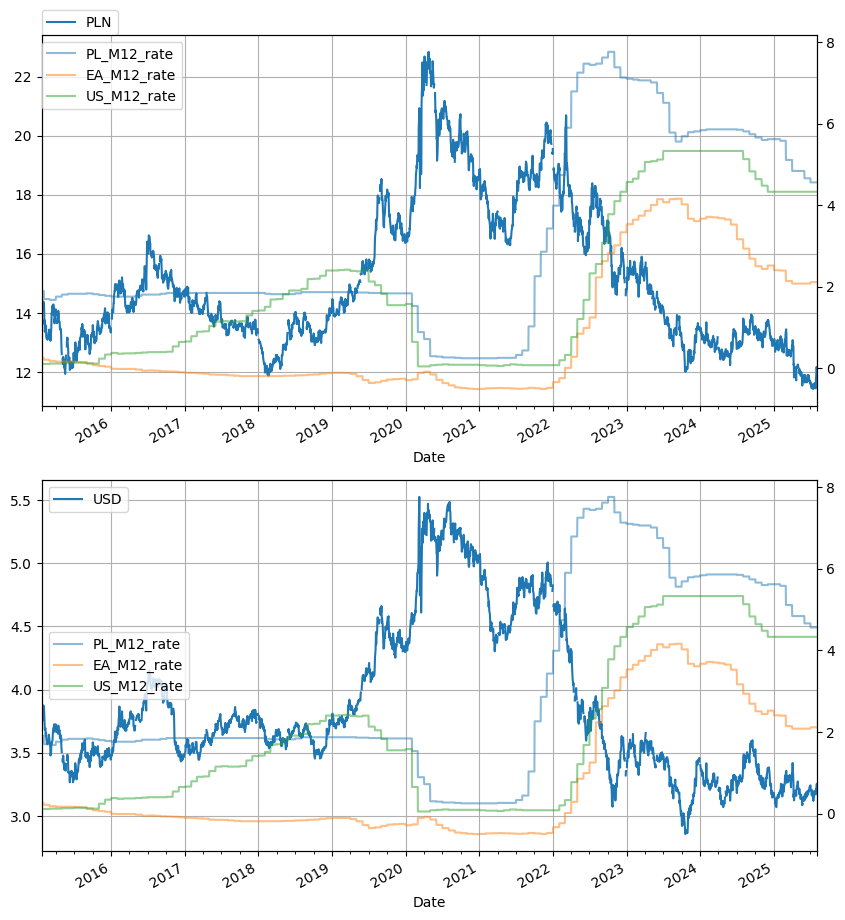

In [10]:
symbol = 'IDTL.L'

ml.summarise(symbol, rates)

## Vanguard obligacji skarbowych rynków wschodzących, USD, akumulujący

,VAGG.DE,Dividends,USDPLN,VAGG.DE_PLN,Dividends_PLN,Dividends rate
Date,,,,,,


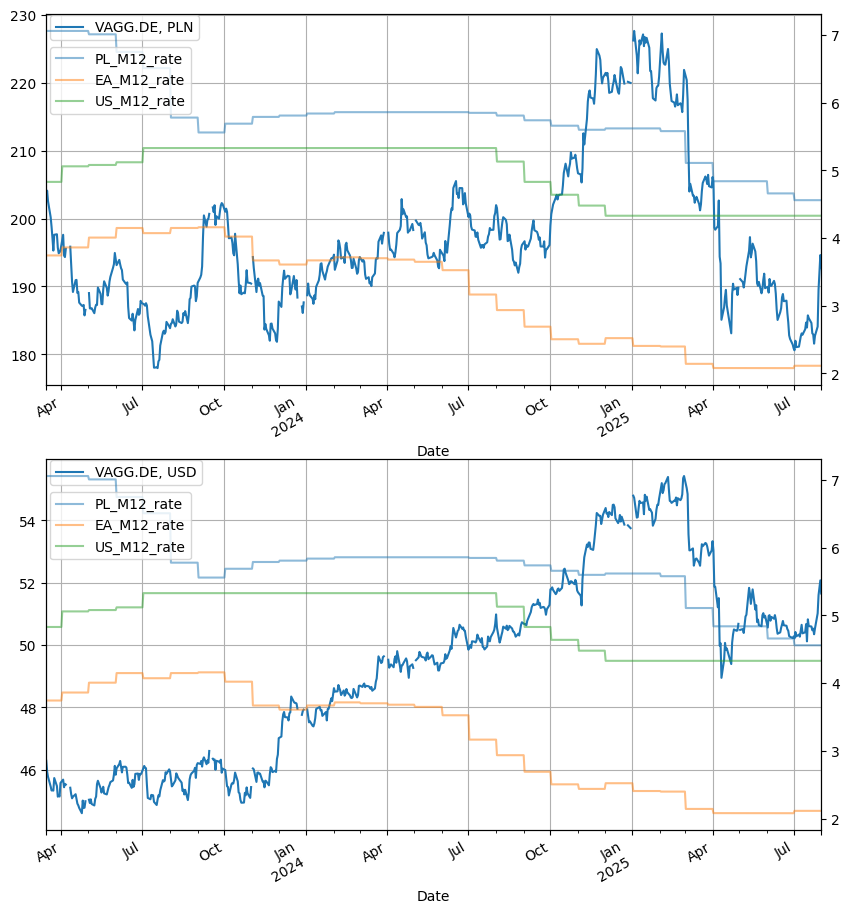

In [ ]:
symbol = 'VAGG.DE' # waluta: USD

ml.summarise(symbol, rates)

## Beta ETF obligacji skarbowych polskich, PLN, akumulujący

,557
symbol,ETFBTBSP.WA
shortName,ETFBTBSP
longName,Beta ETF TBSP Portfelowy FIZ
language,en-US
fundFamily,None
quoteType,ETF
quoteSourceName,Delayed Quote
currency,PLN
netExpenseRatio,NaN
priceHint,2.0


HTTP Error 404: 
$PLNPLN=X: possibly delisted; no timezone found


,ETFBTBSP.WA,Dividends,PLNPLN,ETFBTBSP.WA_PLN,Dividends_PLN,Dividends rate
Date,,,,,,


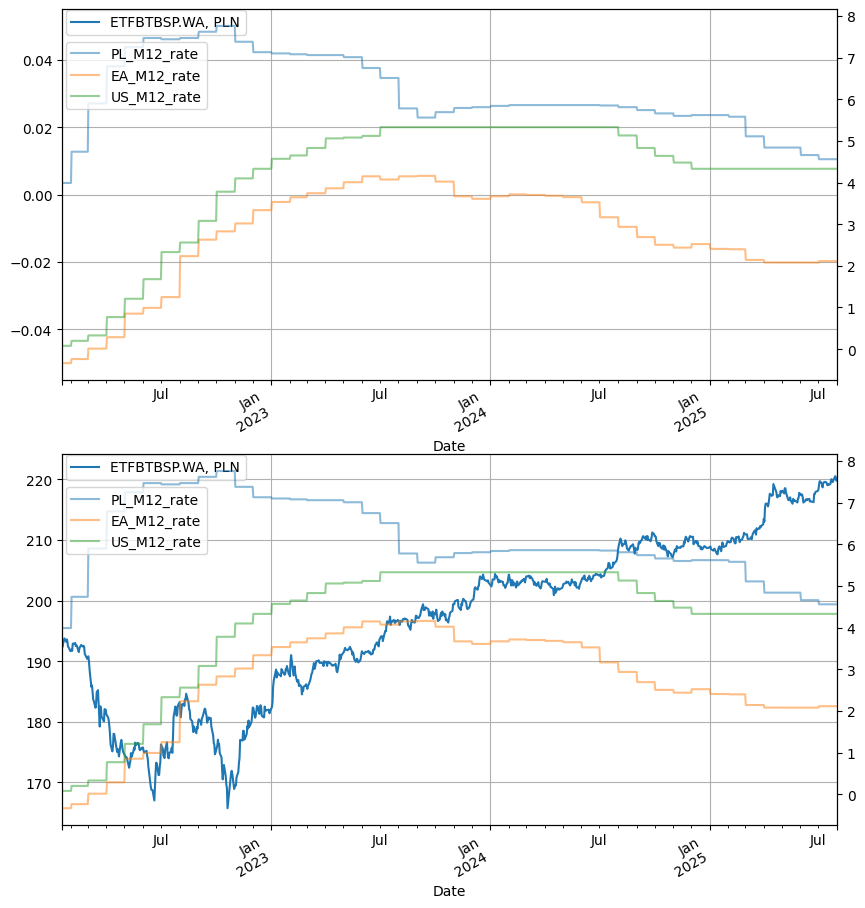

In [13]:
symbol = 'ETFBTBSP.WA'

ml.summarise(symbol, rates)

# Mieszane

## Akcji (60%) i obligacji (40%) Vanguard LifeStrategy, EUR, akumulujący

,1127
symbol,V60A.DE
shortName,Vanguard Fd-LIFEST.60% EQ ETF R
longName,Vanguard LifeStrategy 60% Equity UCITS ETF (EU...
language,en-US
fundFamily,Vanguard Group (Ireland) Limited
quoteType,ETF
quoteSourceName,Delayed Quote
currency,EUR
netExpenseRatio,NaN
priceHint,2.0


,V60A.DE,Dividends,EURPLN,V60A.DE_PLN,Dividends_PLN,Dividends rate
Date,,,,,,


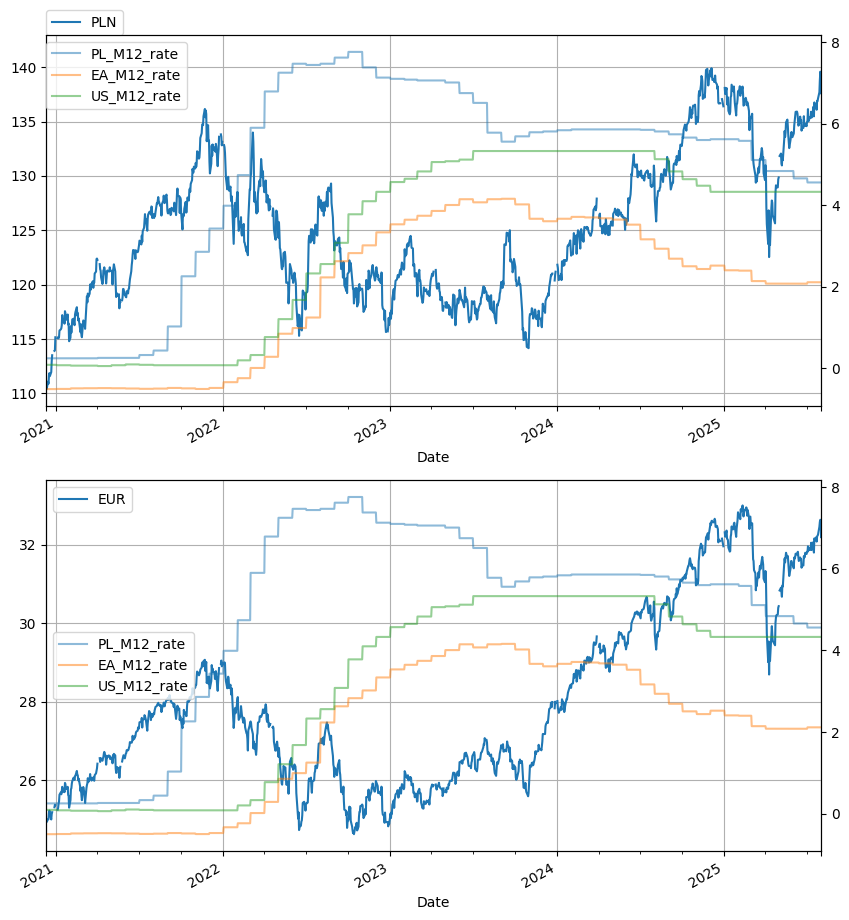

In [11]:
symbol = 'V60A.DE'

ml.summarise(symbol, rates)

## Akcji (20%) i obligacji (80%) Vanguard LifeStrategy, EUR, akumulujący

,692
symbol,V20A.DE
shortName,Vanguard Fd-LIFEST.20% EQ ETF R
longName,Vanguard LifeStrategy 20% Equity UCITS ETF (EU...
language,en-US
fundFamily,Vanguard Group (Ireland) Limited
quoteType,ETF
quoteSourceName,Delayed Quote
currency,EUR
netExpenseRatio,NaN
priceHint,2.0


,V20A.DE,Dividends,EURPLN,V20A.DE_PLN,Dividends_PLN,Dividends rate
Date,,,,,,


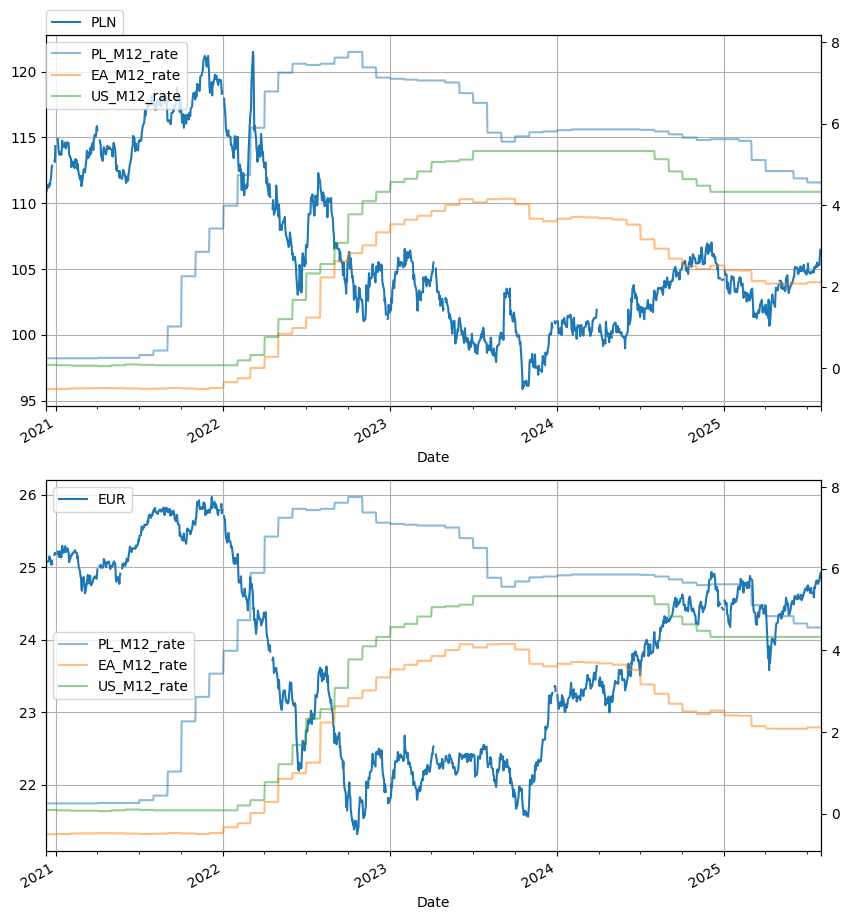

In [12]:
symbol = 'V20A.DE'

ml.summarise(symbol, rates)

## Akcji (80%) i obligacji (20%) Vanguard LifeStrategy, EUR, akumulujący

,85
symbol,V80A.DE
shortName,Vanguard Fd-LIFEST.80%EQ U.ETFR
longName,Vanguard LifeStrategy 80% Equity UCITS ETF (EU...
language,en-US
fundFamily,Vanguard Group (Ireland) Limited
quoteType,ETF
quoteSourceName,Delayed Quote
currency,EUR
netExpenseRatio,NaN
priceHint,2.0


,V80A.DE,Dividends,EURPLN,V80A.DE_PLN,Dividends_PLN,Dividends rate
Date,,,,,,


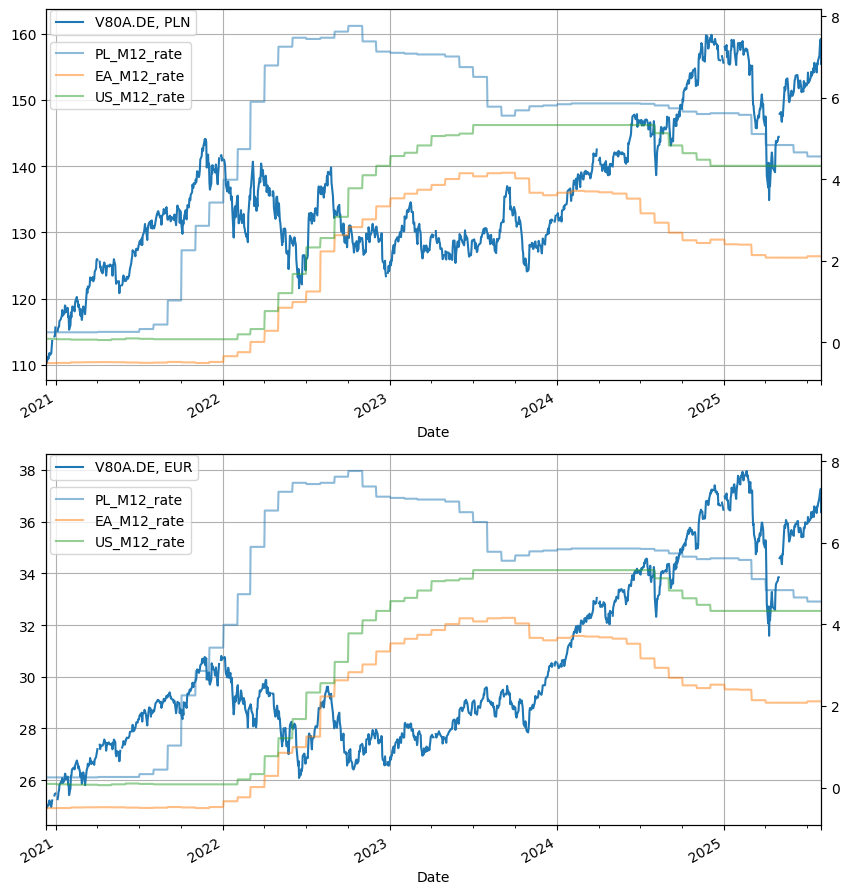

In [17]:
symbol = 'V80A.DE'

ml.summarise(symbol, rates)

# Surowcowe

## iShares na złoto, EUR, akumulujący

,1289
symbol,4GLD.DE
shortName,DT.BOERSE COM. XETRA-GOLD
longName,Xetra-Gold
language,en-US
fundFamily,None
quoteType,EQUITY
quoteSourceName,Delayed Quote
currency,EUR
netExpenseRatio,NaN
priceHint,2.0


,4GLD.DE,Dividends,EURPLN,4GLD.DE_PLN,Dividends_PLN,Dividends rate
Date,,,,,,


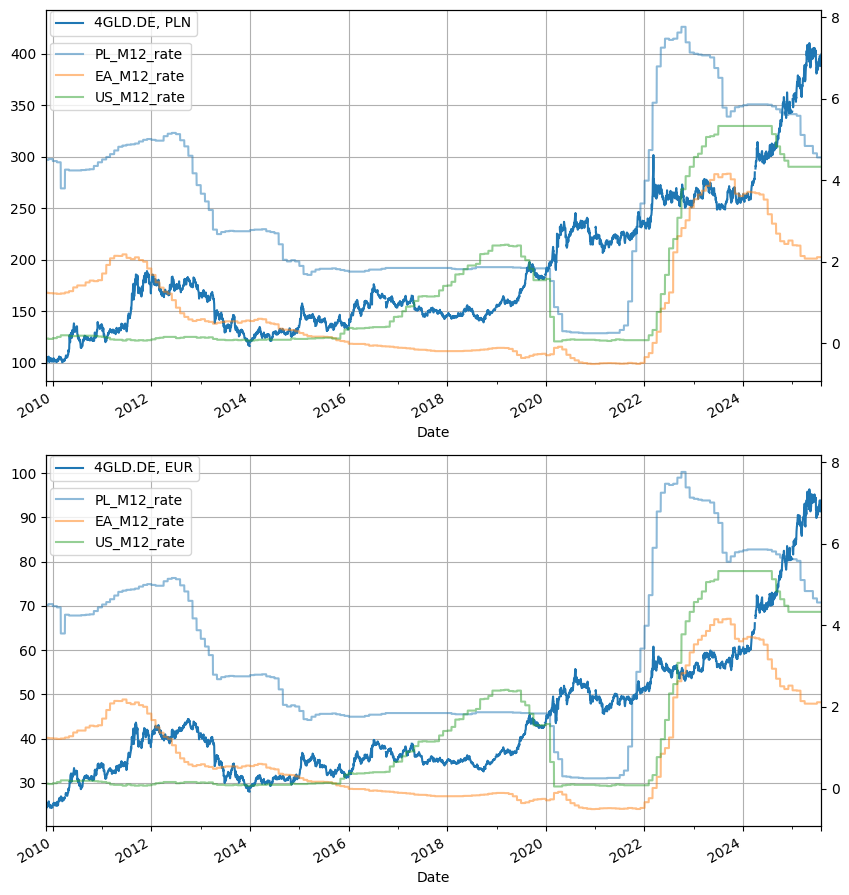

In [7]:
symbol = '4GLD.DE'

ml.summarise(symbol, rates)